In [5]:
import pickle

# Unpickle the file
with open(r'/content/images.p', "rb") as f:
  images = pickle.load(f)

with open(r'/content/labels.p', "rb") as f:
  labels = pickle.load(f)

In [6]:
print(images.shape)
print(labels.shape)

(624, 100, 100)
(624,)


In [7]:
set(labels)

{'bacteria', 'normal', 'virus'}

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

In [9]:
set(labels)

{0, 1, 2}

In [10]:
import numpy as np
n_classes = len(set(labels))
print("Number of classes: ", n_classes)
label_mapping = le.inverse_transform(np.arange(n_classes))
for i in range(len(label_mapping)):
  print(i, "-->", label_mapping[i])

Number of classes:  3
0 --> bacteria
1 --> normal
2 --> virus


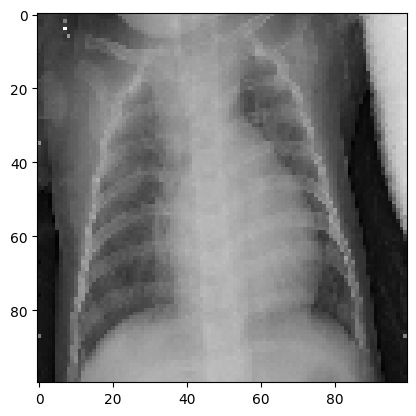

In [11]:
import matplotlib.pyplot as plt

plt.imshow(images[20], cmap=plt.get_cmap("gray"))
plt.show()

In [12]:
import cv2
def preprocessing(img):
  img = cv2.equalizeHist(img)
  img = img.reshape(100, 100, 1)
  img = img/255
  return img

In [13]:
images = np.array(list(map(preprocessing, images)))
print("Shape of Input: ", images.shape)

Shape of Input:  (624, 100, 100, 1)


In [14]:
from tensorflow.keras.utils import to_categorical
labels = to_categorical(labels)

In [15]:
categories = labels.shape[1]
print(categories)

3


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

In [19]:
model = Sequential()
model.add(Conv2D(64, (5,5), input_shape=(100, 100, 1), activation="relu"))
model.add(Conv2D(64, (5,5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(Conv2D(32, (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))

model.add(Dense(3, activation="softmax"))
model.compile(Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 92, 92, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2  (None, 46, 46, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 32)        18464     
                                                                 
 conv2d_3 (Conv2D)           (None, 42, 42, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 21, 21, 32)        0         
 g2D)                                                   

In [ ]:
h=model.fit(images,labels,validation_split=0.2,batch_size=50,epochs=10,verbose=1)

Epoch 1/10
10/10 [==============================] - 82s 8s/step - loss: 0.8561 - accuracy: 0.6814 - val_loss: 4.0416 - val_accuracy: 0.0000e+00
Epoch 2/10
10/10 [==============================] - 75s 7s/step - loss: 0.6849 - accuracy: 0.7976 - val_loss: 2.2721 - val_accuracy: 0.0000e+00
Epoch 3/10
10/10 [==============================] - 78s 8s/step - loss: 0.5169 - accuracy: 0.8277 - val_loss: 2.4192 - val_accuracy: 0.0000e+00
Epoch 4/10
10/10 [==============================] - 80s 8s/step - loss: 0.4379 - accuracy: 0.8497 - val_loss: 2.8746 - val_accuracy: 0.0000e+00
Epoch 5/10
10/10 [==============================] - 76s 8s/step - loss: 0.3831 - accuracy: 0.8657 - val_loss: 2.5299 - val_accuracy: 0.0000e+00
Epoch 6/10
10/10 [==============================] - 81s 8s/step - loss: 0.3912 - accuracy: 0.8497 - val_loss: 1.7517 - val_accuracy: 0.0160
Epoch 7/10
10/10 [==============================] - 77s 8s/step - loss: 0.3400 - accuracy: 0.8838 - val_loss: 2.9020 - val_accuracy: 0.0000e

In [17]:
from tensorflow.keras.models import Model

In [20]:
layer0 = Model(model.layers[0].input, model.layers[0].output)
features = layer0.predict(images[69].reshape(1,100,100,1))

1/1 [==============================] - 0s 248ms/step


In [ ]:
features.shape

(1, 96, 96, 64)

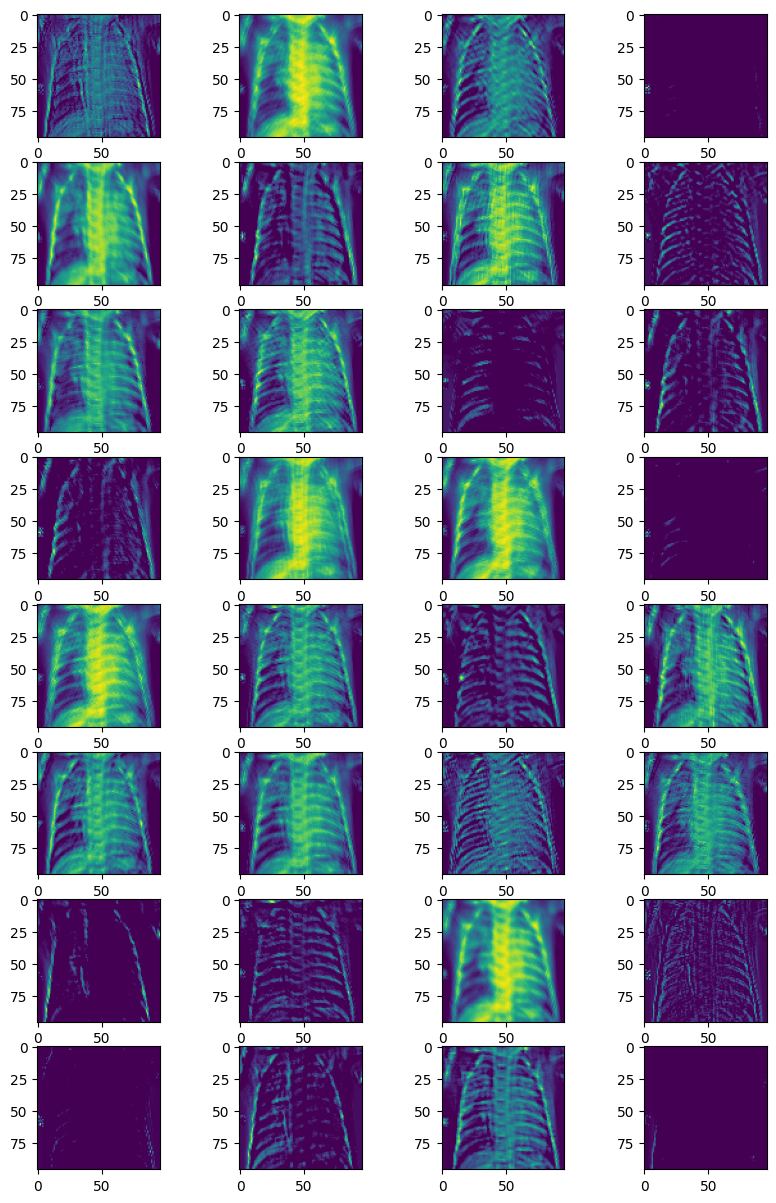

In [ ]:
plt.figure(figsize=(10,15))
for i in range(32):
  axes = plt.subplot(8, 4, i+1)
  plt.imshow(features[0,:,:,i])

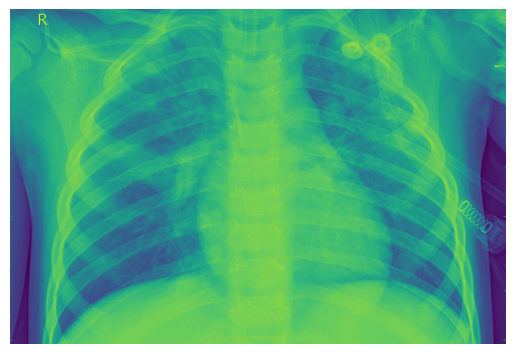

In [34]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

test_file = "/content/person3_virus_16.jpeg"
image = Image.open(test_file)
plt.imshow(image)
plt.axis('off')
plt.show()


In [22]:
img=np.asarray(img)
img=cv2.resize(img,(100,100))
img=preprocessing(img)

In [23]:
img=img.reshape(1,100,100,1)
print(model.predict(img))

1/1 [==============================] - 0s 242ms/step
[[0.30905876 0.3365767  0.35436457]]


In [24]:
prediction = model.predict(img)

1/1 [==============================] - 0s 107ms/step


In [38]:
def get_pred_label(pred):
    labels = ['bacteria', 'normal', 'virus']
    if labels[pred] == 'normal':
        print ("Result : Normal")
    else:
        print ("Result :",labels[pred],"causes pneumonia")
pred=np.argmax(prediction,axis=1)
p = pred[0]
print(p)
get_pred_label(p)

2
Result : virus causes pneumonia


In [ ]:
model.save('finalmodel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
